In [ ]:
# From the subplots, we can easily determine that 'Hardness' is not normally distributed
# A good transformation in that case is a square root transformation
# Let's drop Mo as it is not a significant predictor in hardness

In [12]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [26]:
dataset = pd.read_csv(r'C:\Users\ameli\Downloads\Ina_HardnessSqrt.csv')

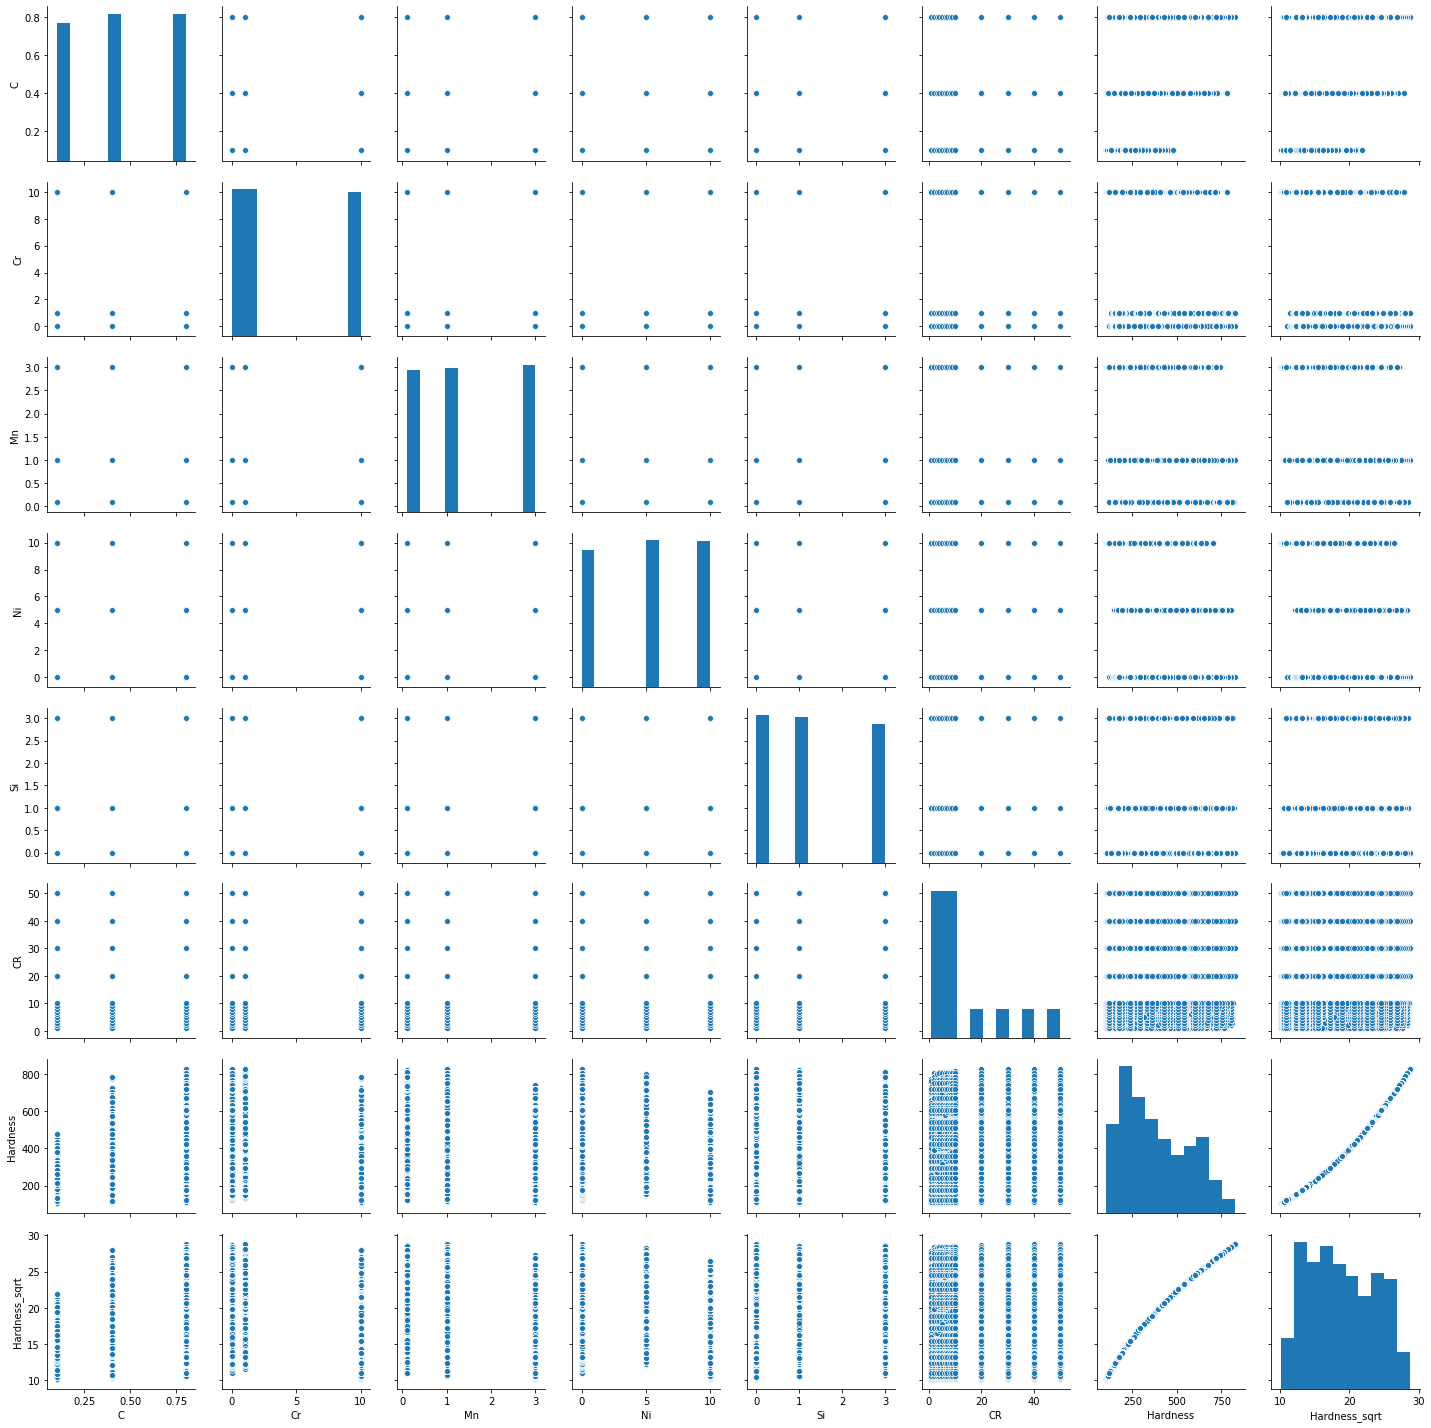

In [27]:
sns.pairplot(dataset)

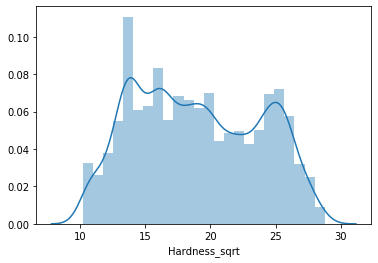

In [36]:
sns.distplot(dataset['Hardness_sqrt']);

In [37]:
dataset.corr()

,C,Cr,Mn,Ni,Si,CR,Hardness,Hardness_sqrt
C,1.000000e+00,6.966048e-03,-2.287167e-02,-3.520842e-02,2.827932e-02,7.717837e-18,0.205004,0.172738
Cr,6.966048e-03,1.000000e+00,1.349927e-03,7.597540e-03,-7.221963e-03,4.099898e-17,-0.332665,-0.343964
Mn,-2.287167e-02,1.349927e-03,1.000000e+00,-2.390605e-02,1.796596e-02,9.430984e-18,-0.301391,-0.300103
Ni,-3.520842e-02,7.597540e-03,-2.390605e-02,1.000000e+00,3.008054e-02,4.305762e-17,-0.283751,-0.301493
Si,2.827932e-02,-7.221963e-03,1.796596e-02,3.008054e-02,1.000000e+00,-3.188884e-17,-0.161180,-0.156336
CR,7.717837e-18,4.099898e-17,9.430984e-18,4.305762e-17,-3.188884e-17,1.000000e+00,0.071525,0.067490
Hardness,2.050042e-01,-3.326648e-01,-3.013906e-01,-2.837509e-01,-1.611805e-01,7.152494e-02,1.000000,0.993590
Hardness_sqrt,1.727377e-01,-3.439639e-01,-3.001028e-01,-3.014931e-01,-1.563356e-01,6.749029e-02,0.993590,1.000000


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 8 columns):
C                9968 non-null float64
Cr               9968 non-null int64
Mn               9968 non-null float64
Ni               9968 non-null int64
Si               9968 non-null int64
CR               9968 non-null int64
Hardness         9968 non-null float64
Hardness_sqrt    9968 non-null float64
dtypes: float64(4), int64(4)
memory usage: 623.1 KB


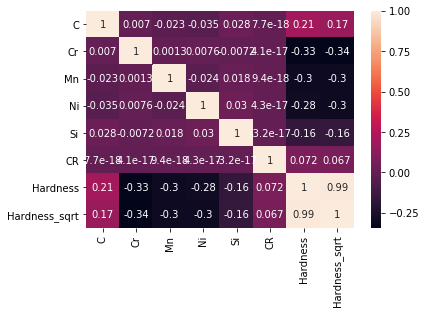

In [39]:
sns.heatmap(dataset.corr(),annot=True)

In [40]:
dataset.describe()

,C,Cr,Mn,Ni,Si,CR,Hardness,Hardness_sqrt
count,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000,9968.000000
mean,0.440309,3.622191,1.385253,5.105337,1.299157,13.928571,381.445609,18.945520
std,0.285411,4.481360,1.215051,4.056877,1.238083,14.806457,184.118918,4.745013
min,0.100000,0.000000,0.100000,0.000000,0.000000,1.000000,104.017000,10.198872
25%,0.100000,0.000000,0.100000,0.000000,0.000000,4.000000,220.014000,14.832869
50%,0.400000,1.000000,1.000000,5.000000,1.000000,7.500000,342.804500,18.514980
75%,0.800000,10.000000,3.000000,10.000000,3.000000,20.000000,537.512000,23.184305
max,0.800000,10.000000,3.000000,10.000000,3.000000,50.000000,827.946000,28.774051


In [41]:
dataset.shape

(9968, 8)

In [42]:
dataset.isnull().any()

C                False
Cr               False
Mn               False
Ni               False
Si               False
CR               False
Hardness         False
Hardness_sqrt    False
dtype: bool

In [44]:
X = dataset[['C', 'Cr', 'Mn', 'Ni', 'Si', 'CR']].values
y = dataset['Hardness_sqrt'].values

In [45]:
plt.figure(figsize=(15,10))
plt.tight_layout()
#seabornInstance.distplot(dataset['quality'])

<Figure size 1080x720 with 0 Axes>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [47]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [ 2.76020904 -0.36517403 -1.17322389 -0.3456316  -0.5683315   0.01890367]


In [49]:
y_pred = regressor.predict(X_train)

Text(0, 0.5, 'Predicted Y')

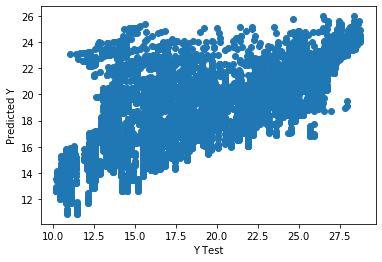

In [50]:
plt.scatter(y_train,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0.5, 1.0, 'Residuals PDF')

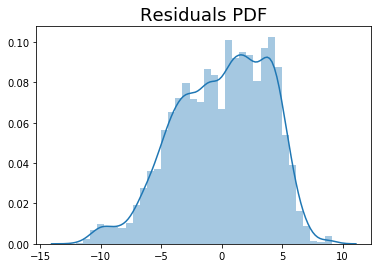

In [51]:
sns.distplot(y_train - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 3.170285500234412
Mean Squared Error: 14.507895933861475
Root Mean Squared Error: 3.808923198734975


In [53]:
# Find the R-squared of the model
regressor.score(X_train,y_train)

0.35305607863297794

In [54]:
regressor.intercept_

22.92316535067743

In [55]:

regressor.coef_

array([ 2.76020904, -0.36517403, -1.17322389, -0.3456316 , -0.5683315 ,
        0.01890367])

# Testing

In [56]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_pred_test = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

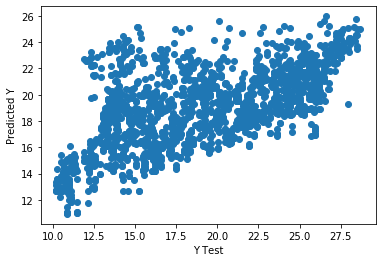

In [57]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [58]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_pred_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,19.624998
1,18.518467
2,18.291930
3,22.369584
4,18.568425


In [59]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf


,Prediction,Target
0,19.624998,13.348745
1,18.518467,20.052780
2,18.291930,13.180857
3,22.369584,25.993345
4,18.568425,20.018417
5,17.183587,24.519584
6,20.472514,14.467170
7,14.247548,15.493773
8,16.790309,20.479453
9,21.296000,25.975623


In [60]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [61]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,19.624998,13.348745,-6.276253,47.017550
1,18.518467,20.052780,1.534314,7.651376
2,18.291930,13.180857,-5.111073,38.776485
3,22.369584,25.993345,3.623761,13.941112
4,18.568425,20.018417,1.449991,7.243287
5,17.183587,24.519584,7.335997,29.918929
6,20.472514,14.467170,-6.005345,41.510155
7,14.247548,15.493773,1.246224,8.043389
8,16.790309,20.479453,3.689144,18.013881
9,21.296000,25.975623,4.679623,18.015441


In [62]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,19.006606,18.979452,-0.027154,18.046304
std,2.863489,4.782601,3.843871,14.882360
min,10.942078,10.198872,-10.935545,0.014028
25%,16.983824,14.849175,-2.813756,7.797321
50%,19.076120,18.608646,0.389073,14.900593
75%,21.159288,23.395106,3.088376,22.983463
max,25.959194,28.699686,8.994901,91.407646


In [63]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1220,16.03,16.03,-0.00,0.01
652,21.63,21.62,-0.01,0.05
794,23.04,23.01,-0.03,0.12
1537,16.05,16.03,-0.02,0.13
15,15.96,15.99,0.03,0.19
1556,22.42,22.37,-0.04,0.20
958,17.81,17.77,-0.04,0.23
218,18.08,18.04,-0.04,0.25
1308,20.21,20.15,-0.05,0.26
1905,18.36,18.31,-0.05,0.29


In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 3.1749142257238674
Mean Squared Error: 14.768668218074364
Root Mean Squared Error: 3.843002500399182


In [65]:
regressor.score(X_test,y_test)

0.35400241737775306

In [66]:
model = sm.OLS(y_test,X_test)
results = model.fit()
results_summary = results.summary()

In [67]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              1394.
Date:                Thu, 07 May 2020   Prob (F-statistic):                        0.00
Time:                        01:02:30   Log-Likelihood:                         -7114.6
No. Observations:                1994   AIC:                                  1.424e+04
Df Residuals:                    1988   BIC:                                  1.427e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.1325      0.559     30.642      0.000      16.036      18.229
x2             0.1062      0.041      2.577      0.010       0.025       0.187
x3             1.3661      0.146      9.353      0.000       1.080       1.653
x4             0.4153      0.044      9.532      0.000       0.330       0.501
x5             1.2833      0.151      8.522      0.000       0.988       1.579
x6             0.1891      0.012     15.343      0.000       0.165       0.213
==============================================================================
Omnibus:                      108.650   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.413
Skew:                          -0.545   Prob(JB):                     3.89e-25
Kurtosis:                       2.597   Cond. No.                         61.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

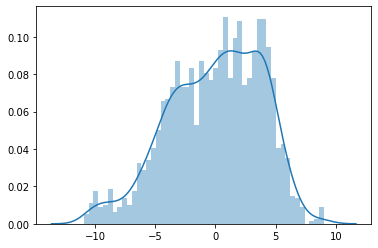

In [68]:
sns.distplot((y_test-y_pred_test),bins=50);


In [69]:
y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
df = pd.DataFrame( y_test_df, y_pred_df)
df1 = df.head(25)

In [70]:
x_df = pd.DataFrame(X)
coefficients = pd.DataFrame(regressor.coef_,x_df.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
0,2.76
1,-0.37
2,-1.17
3,-0.35
4,-0.57
5,0.02


In [71]:
print('intercept:', regressor.intercept_)

intercept: 22.92316535067743
